In [60]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

In [61]:
petersen = ig.Graph.Famous('Petersen')

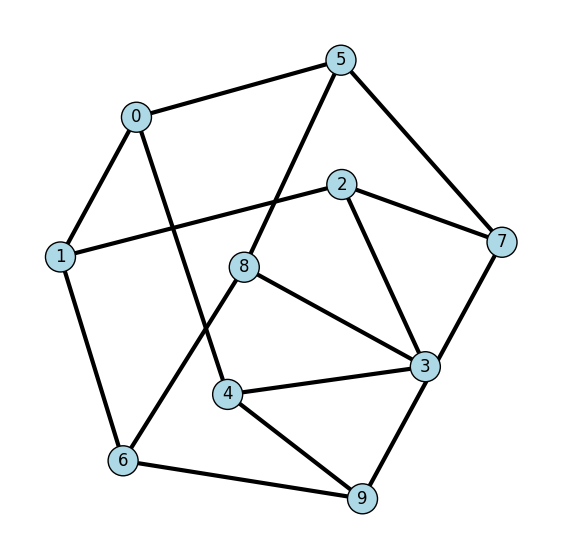

In [62]:
fig, ax = plt.subplots(figsize=(7, 7))
ig.plot(
    petersen,
    target=ax,
    # layout = petersen.layout("sphere"),
    vertex_size=30,
    vertex_label=range(10),
    vertex_color="lightblue",
    edge_width=[3],
    edge_color=["black"]
)

In [72]:
adj_matrix = petersen.get_adjacency()
print("Adjacency matrix:")
print(adj_matrix)

Adjacency matrix:
[[0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
 [1, 0, 1, 0, 0, 0, 1, 0, 0, 0]
 [0, 1, 0, 1, 0, 0, 0, 1, 0, 0]
 [0, 0, 1, 0, 1, 0, 0, 0, 1, 0]
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 1]
 [1, 0, 0, 0, 0, 0, 0, 1, 1, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 1, 1]
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 1]
 [0, 0, 0, 1, 0, 1, 1, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0]]


In [73]:
eigenvalues = np.linalg.eigh(adj_matrix)[0]
eigenvectors = np.linalg.eigh(adj_matrix)[1]
rounded_eigenvalues = np.round(eigenvalues, decimals=1)
reverse_sorted_eigenvalues = np.sort(rounded_eigenvalues)[::-1]

print("Eigenvalues of the adjacency matrix:")
print(reverse_sorted_eigenvalues)

Eigenvalues of the adjacency matrix:
[ 3.  1.  1.  1.  1.  1. -2. -2. -2. -2.]


In [74]:
largest_eigenvector = eigenvectors[:, -1]
print("Eigenvector corresponding to the largest eigenvalue of the adjacency matrix:")
print("\n".join(str(np.round(element, decimals=2)) for element in largest_eigenvector))

Eigenvector corresponding to the largest eigenvalue of the adjacency matrix:
-0.32
-0.32
-0.32
-0.32
-0.32
-0.32
-0.32
-0.32
-0.32
-0.32


In [75]:
# laplacian matrix 
laplacian = np.array(petersen.laplacian())
print(laplacian)

laplacian_eigenvalues = np.linalg.eigh(laplacian)[0]
laplacian_eigenvectors = np.linalg.eigh(laplacian)[1]
rounded_laplacian_eigenvalues = np.round(laplacian_eigenvalues, decimals=1)
sorted_laplacian_eigenvalues = np.sort(rounded_laplacian_eigenvalues)

print("Eigenvalues of the Laplacian matrix:", sorted_laplacian_eigenvalues)

# print product of eigenvalues of laplacian matrix rounded to 1 decimal place
print("Product of eigenvalues of the Laplacian matrix:",
  np.round(np.prod(sorted_laplacian_eigenvalues[1:]), decimals=0))

[[ 3. -1.  0.  0. -1. -1.  0.  0.  0.  0.]
 [-1.  3. -1.  0.  0.  0. -1.  0.  0.  0.]
 [ 0. -1.  3. -1.  0.  0.  0. -1.  0.  0.]
 [ 0.  0. -1.  3. -1.  0.  0.  0. -1.  0.]
 [-1.  0.  0. -1.  3.  0.  0.  0.  0. -1.]
 [-1.  0.  0.  0.  0.  3.  0. -1. -1.  0.]
 [ 0. -1.  0.  0.  0.  0.  3.  0. -1. -1.]
 [ 0.  0. -1.  0.  0. -1.  0.  3.  0. -1.]
 [ 0.  0.  0. -1.  0. -1. -1.  0.  3.  0.]
 [ 0.  0.  0.  0. -1.  0. -1. -1.  0.  3.]]
Eigenvalues of the Laplacian matrix: [-0.  2.  2.  2.  2.  2.  5.  5.  5.  5.]
Product of eigenvalues of the Laplacian matrix: 20000.0
